# Comparing Sentiment to Implied Volatility 

In [1]:
import numpy as np

import pandas as pd
import datetime as dt
import yfinance as yf

def options_chain(symbol):
    tk = yf.Ticker(symbol)
    
    expiration_dates = tk.options
    
    # Get options for each expiration
    options = pd.DataFrame()
    
    for e in expiration_dates:
        opt = tk.option_chain(e)
        #opt = pd.DataFrame().append(opt.calls).append(opt.puts)
        opt = pd.concat([opt.calls, opt.puts], axis = 0)
        opt[['expirationDate']] = e
        #options = options.append(opt, ignore_index = True)
        options = pd.concat([options, opt], axis = 0)
    
    options['expirationDate'] = pd.to_datetime(options['expirationDate']) + dt.timedelta(days = 1)
    options['dte'] = (options['expirationDate'] - dt.datetime.today()).dt.days / 365
    
    options['CALL'] = options['contractSymbol'].str[4:].apply(lambda x: "C" in x)
    
    options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options['mark'] = (options['bid'] + options['ask'])
    
    return options


In [2]:
tsla = yf.Ticker('TSLA')

tsla_options = tsla.option_chain()

tsla_options

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0   TSLA231208C00030000 2023-12-01 19:58:30+00:00    30.0     208.69  208.25   
1   TSLA231208C00040000 2023-11-29 20:46:26+00:00    40.0     203.73  198.25   
2   TSLA231208C00050000 2023-11-13 19:48:11+00:00    50.0     174.36  188.25   
3   TSLA231208C00080000 2023-12-01 14:40:15+00:00    80.0     155.04  158.30   
4   TSLA231208C00090000 2023-12-01 20:54:52+00:00    90.0     148.22  148.30   
..                  ...                       ...     ...        ...     ...   
93  TSLA231208C00420000 2023-11-21 16:52:30+00:00   420.0       0.01    0.00   
94  TSLA231208C00425000 2023-11-21 19:27:51+00:00   425.0       0.01    0.00   
95  TSLA231208C00430000 2023-11-20 14:43:59+00:00   430.0       0.01    0.00   
96  TSLA231208C00435000 2023-11-07 20:23:07+00:00   435.0       0.02    0.00   
97  TSLA231208C00440000 2023-11-30 15:42:17+00:00   440.0       0.01    0.00   

       ask      change  p

In [3]:
tech_news = pd.read_csv('tech_news_processed.csv')

tech_news['date'] = pd.to_datetime(tech_news['date'])

articles_2012_2015 = tech_news[(tech_news['date'].dt.year >= 2012) & (tech_news['date'].dt.year <= 2015)]


articles_2012_2015_std = articles_2012_2015.resample('1D', on='date')['Polarity'].std().reset_index()


articles_2012_2015_std.dropna(inplace=True)

articles_2012_2015_std.reset_index(drop=True, inplace=True)

articles_2012_2015_std





,date,Polarity
0,2012-01-28,0.224050
1,2012-01-29,0.000000
2,2012-02-04,0.440959
3,2012-02-05,0.058136
4,2012-02-11,0.234521
...,...,...
325,2015-12-23,0.048212
326,2015-12-28,0.390352
327,2015-12-29,0.325807
328,2015-12-30,0.074870


In [4]:

vix = yf.Ticker('^VIX')

start_date = dt.datetime(2012, 1, 1)
end_date = dt.datetime(2015, 12, 31)

vix_hist = vix.history(start=start_date, end=end_date).reset_index()



In [5]:
merged = pd.concat([articles_2012_2015_std, vix_hist], axis=1)

In [6]:
merged.dropna(inplace=True)

merged

,date,Polarity,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-01-28,0.224050,2012-01-03 00:00:00-06:00,22.950001,23.100000,22.540001,22.969999,0,0.0,0.0
1,2012-01-29,0.000000,2012-01-04 00:00:00-06:00,23.440001,23.730000,22.219999,22.219999,0,0.0,0.0
2,2012-02-04,0.440959,2012-01-05 00:00:00-06:00,22.750000,23.090000,21.340000,21.480000,0,0.0,0.0
3,2012-02-05,0.058136,2012-01-06 00:00:00-06:00,21.240000,21.719999,20.580000,20.629999,0,0.0,0.0
4,2012-02-11,0.234521,2012-01-09 00:00:00-06:00,21.670000,21.780001,21.000000,21.070000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
325,2015-12-23,0.048212,2013-04-22 00:00:00-05:00,15.080000,16.000000,14.040000,14.390000,0,0.0,0.0
326,2015-12-28,0.390352,2013-04-23 00:00:00-05:00,13.810000,14.870000,13.460000,13.480000,0,0.0,0.0
327,2015-12-29,0.325807,2013-04-24 00:00:00-05:00,13.570000,13.750000,13.360000,13.610000,0,0.0,0.0
328,2015-12-30,0.074870,2013-04-25 00:00:00-05:00,13.610000,13.870000,13.130000,13.620000,0,0.0,0.0


In [7]:
import altair as alt 

alt.Chart(merged).mark_line().encode(
    x='Date',
    y='Close',
    color='Polarity'
)

alt.Chart(...)

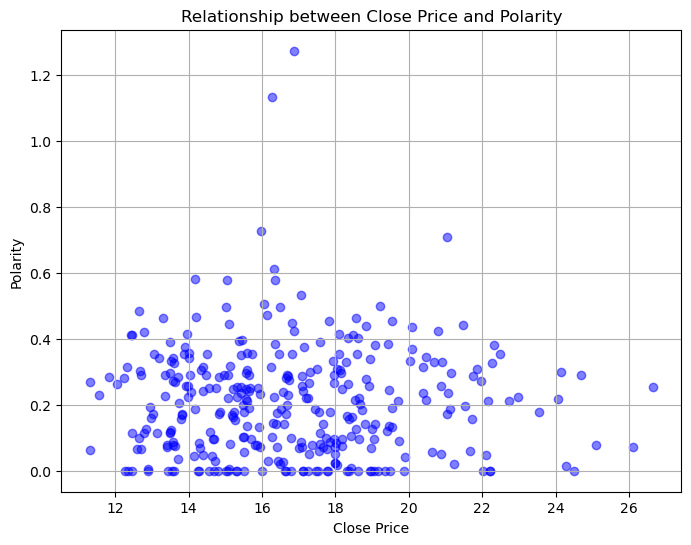

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged['Close'], merged['Polarity'], alpha=0.5, color='blue')

# Set plot labels and title
plt.title('Relationship between Close Price and Polarity')
plt.xlabel('Close Price')
plt.ylabel('Polarity')

# Show plot
plt.grid(True)
plt.show()

In [9]:
spyIV = pd.read_csv('HistoricalIV_SPY.csv')

In [10]:
spyIV

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume
0,12/1/2023,10.8200,11.5100,10.9898,14.6331,8330622.0
1,11/30/2023,10.7000,11.6535,11.3107,14.6387,7666927.0
2,11/29/2023,10.7200,11.8695,11.2081,14.6682,7663598.0
3,11/28/2023,10.2100,12.1385,11.5656,14.6663,6742061.0
4,11/27/2023,10.1800,12.4955,11.9775,14.6770,5676616.0
...,...,...,...,...,...,...
4734,1/14/2005,11.2243,11.8472,NaN,NaN,NaN
4735,1/13/2005,11.8837,12.0030,NaN,NaN,NaN
4736,1/12/2005,11.7508,12.0428,NaN,NaN,NaN
4737,1/11/2005,12.2296,12.1887,NaN,NaN,NaN


In [11]:
US_news = pd.read_csv('US_news_processed.csv')
business_news = pd.read_csv('business_news_processed.csv')


In [12]:
US_news['date'] = pd.to_datetime(US_news['Date'])

US_news.drop(columns=['Unnamed: 0', 'Date'], inplace=True)

US_news

,Heading,Article,Subjectivity,Polarity,Content Subjectivity,Content Polarity,date
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,0.000000,0.000000,0.377273,0.118182,2022-09-23
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,0.200000,0.100000,0.000000,0.000000,2022-09-23
2,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,0.266667,-0.233333,0.550000,-0.233333,2022-09-22
3,Cleaner Was Dead In Belk Bathroom For 4 Days B...,The 63-year-old woman was seen working at the ...,0.400000,-0.200000,0.225000,-0.200000,2022-09-22
4,Reporter Gets Adorable Surprise From Her Boyfr...,"""Who's that behind you?"" an anchor for New Yor...",0.750000,0.318182,0.577273,-0.131818,2022-09-22
...,...,...,...,...,...,...,...
1607,World Bank announces 57 bln in financing for Afri,strong>WASHINGTON: The World Bank on Sunday an...,0.000000,0.000000,0.416456,0.129798,2017-03-20
1608,Uber grounds self driving cars after accid,strong>WASHINGTON: Uber has grounded its fleet...,0.000000,0.000000,0.392063,-0.083730,2017-03-26
1609,Trump son in law 4 bn deal Chinese company,strong>WASHINGTON: A company owned by the fami...,0.000000,0.000000,0.388505,0.141968,2017-03-14
1610,World Bank announces 57 bln in financing for Afri,strong>WASHINGTON: The World Bank on Sunday an...,0.000000,0.000000,0.416456,0.129798,2017-03-20


In [13]:
World_news = pd.read_csv("world_news_processed.csv")
World_news['date'] = pd.to_datetime(World_news['Date'])
World_news.drop(columns = ['Date'], inplace=True)
World_news

,Unnamed: 0,Heading,Article,Subjectivity,Polarity,Content Subjectivity,Content Polarity,date
0,0,Puerto Ricans Desperate For Water After Hurric...,More than half a million people remained witho...,1.000000,-0.600000,0.333333,0.166667,2022-09-22
1,1,Biden At UN To Call Russian War An Affront To ...,White House officials say the crux of the pres...,0.000000,0.000000,0.500000,-0.437500,2022-09-21
2,2,World Cup Captains Want To Wear Rainbow Armban...,FIFA has come under pressure from several Euro...,0.000000,0.000000,0.033333,0.000000,2022-09-21
3,3,Man Sets Himself On Fire In Apparent Protest O...,The incident underscores a growing wave of pro...,0.350000,0.050000,0.250000,0.250000,2022-09-21
4,4,Fiona Threatens To Become Category 4 Storm Hea...,Hurricane Fiona lashed the Turks and Caicos Is...,0.000000,0.000000,0.125000,-0.125000,2022-09-21
...,...,...,...,...,...,...,...,...
4341,4343,Chinese train manufacturer wins railcar bid in US,strong>BEIJING: A Chinese rail company has won...,0.100000,0.150000,0.398691,0.158471,2017-03-25
4342,4344,Laptop ban hits Dubai for 11m weekend traveller,strong>DUBAI: Dubai International Airport and ...,0.000000,0.000000,0.302778,0.043182,2017-03-25
4343,4345,Pak China relations not against any third coun...,"strong>BEIJING: Former Prime Minister, Shaukat...",0.000000,0.000000,0.173333,0.110000,2017-03-26
4344,4346,New Development Bank plans joint investments i...,strong>BEIJING: The New Development Bank plans...,0.454545,0.136364,0.408018,0.091746,2017-03-27


In [14]:
c1 = pd.read_csv("commodities1_processed.csv")
c1['date'] = pd.to_datetime(c1['date'])
c1.drop(columns = ['Unnamed: 0', 'year', 'month'], inplace=True)

In [15]:
c2 = pd.read_csv("commodities2_processed.csv")
c2['date'] = c2['date'].astype('string')
c2['date'] = c2['date'].apply(lambda x: x.replace('/', '-'))
c2['date'] = pd.to_datetime(c2['date'])
c2.drop(columns = ['Unnamed: 0', 'year', 'month'], inplace=True)

In [16]:
combined_news_1 = pd.concat([US_news, business_news, tech_news, World_news, c1, c2], axis=0)
combined_news_1.drop(columns=['Unnamed: 0', 'Heading', 'Article', 'short_description', 'headline', 'category', 'title', 'publication', 'content'], inplace = True)
combined_news_1

,Subjectivity,Polarity,Content Subjectivity,Content Polarity,date
0,0.000000,0.000000,0.377273,0.118182,2022-09-23 00:00:00
1,0.200000,0.100000,0.000000,0.000000,2022-09-23 00:00:00
2,0.266667,-0.233333,0.550000,-0.233333,2022-09-22 00:00:00
3,0.400000,-0.200000,0.225000,-0.200000,2022-09-22 00:00:00
4,0.750000,0.318182,0.577273,-0.131818,2022-09-22 00:00:00
...,...,...,...,...,...
7836,0.750000,0.500000,0.560095,0.152341,2016-12-27 00:00:00
7837,0.454545,0.136364,0.403359,0.121572,2016-12-28 00:00:00
7838,0.000000,0.000000,0.434710,0.065793,2016-12-29 00:00:00
7839,0.000000,0.000000,0.409185,0.036968,2016-12-29 00:00:00


In [17]:
combined_news = pd.concat([US_news, business_news, tech_news], axis=0)

In [18]:
combined_news.drop(columns=['Unnamed: 0', 'Heading', 'Article', 'short_description', 'headline', 'category'], inplace=True)

In [19]:
combined_news

,Subjectivity,Polarity,Content Subjectivity,Content Polarity,date
0,0.000000,0.000000,0.377273,0.118182,2022-09-23 00:00:00
1,0.200000,0.100000,0.000000,0.000000,2022-09-23 00:00:00
2,0.266667,-0.233333,0.550000,-0.233333,2022-09-22 00:00:00
3,0.400000,-0.200000,0.225000,-0.200000,2022-09-22 00:00:00
4,0.750000,0.318182,0.577273,-0.131818,2022-09-22 00:00:00
...,...,...,...,...,...
2098,0.500000,0.000000,0.517857,0.354911,2012-01-28 00:00:00
2099,0.000000,0.000000,0.295833,0.041667,2012-01-28 00:00:00
2100,0.207407,0.031481,0.411111,0.316667,2012-01-28 00:00:00
2101,0.500000,0.500000,0.633333,0.366667,2012-01-28 00:00:00


To revert changes, uncomment the commented code and comment the uncommented code.

In [20]:
#combined_news['date'] = pd.to_datetime(combined_news['date'])

#oldest_date = combined_news['date'].min()
#most_recent_date = combined_news['date'].max()

combined_news_1['date'] = pd.to_datetime(combined_news_1['date'])

oldest_date = combined_news_1['date'].min()
most_recent_date = combined_news_1['date'].max()

In [21]:
#spyIV['Date'] = pd.to_datetime(spyIV['Date'])

#spyIV = spyIV[(spyIV['Date'] >= oldest_date) & (spyIV['Date'] <= most_recent_date)].reset_index(drop=True)

#spyIV

spyIV['Date'] = pd.to_datetime(spyIV['Date'])

spyIV = spyIV[(spyIV['Date'] >= oldest_date) & (spyIV['Date'] <= most_recent_date)].reset_index(drop=True)

spyIV

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume
0,2022-09-23,27.2500,23.3130,24.7004,21.9399,13803193.0
1,2022-09-22,25.2500,22.9190,24.6545,21.9436,8510835.0
2,2022-09-21,26.1400,22.6710,23.2973,21.8277,9723268.0
3,2022-09-20,25.1700,22.4105,23.6350,21.8820,6950163.0
4,2022-09-19,23.6600,22.1925,23.0622,21.8237,7426550.0
...,...,...,...,...,...,...
3369,2009-04-13,36.2173,38.5486,NaN,NaN,NaN
3370,2009-04-09,34.2882,38.9909,NaN,NaN,NaN
3371,2009-04-08,35.9798,39.4963,NaN,NaN,NaN
3372,2009-04-07,37.4447,40.0463,NaN,NaN,NaN


In [22]:
#articles_std = combined_news.resample('1D', on='date')['Polarity'].std().reset_index()

#articles_std.dropna(inplace=True)

#articles_std

articles_std_1 = combined_news_1.resample('1D', on='date')[['Polarity', 'Subjectivity', 'Content Polarity', 'Content Subjectivity']].std().reset_index()
articles_std_1.dropna(inplace=True)
articles_std_1

,date,Polarity,Subjectivity,Content Polarity,Content Subjectivity
1027,2012-01-28,0.207615,0.297288,0.324906,0.301097
1028,2012-01-29,0.317304,0.371966,0.139138,0.240321
1034,2012-02-04,0.300415,0.326006,0.166929,0.311393
1035,2012-02-05,0.213640,0.313416,0.265383,0.300798
1041,2012-02-11,0.257337,0.340435,0.177957,0.345630
...,...,...,...,...,...
4914,2022-09-19,0.105018,0.206479,0.000000,0.000000
4915,2022-09-20,0.000000,0.000000,0.057735,0.230940
4916,2022-09-21,0.020412,0.142887,0.268144,0.211766
4917,2022-09-22,0.377635,0.333437,0.182484,0.170453


In [23]:
#articles_std.rename(columns={'date': 'Date'}, inplace=True)
articles_std_1.rename(columns={'date': 'Date', 'Polarity':'Headline Polarity', 'Subjectivity':'Headline Subjectivity'}, inplace=True)

In [24]:
#merged = pd.merge(spyIV, articles_std, on='Date')
merged1 = pd.merge(spyIV, articles_std_1, on='Date')

In [25]:
#merged
merged1

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume,Headline Polarity,Headline Subjectivity,Content Polarity,Content Subjectivity
0,2022-09-23,27.2500,23.3130,24.7004,21.9399,13803193.0,0.070711,0.141421,0.083567,0.266772
1,2022-09-22,25.2500,22.9190,24.6545,21.9436,8510835.0,0.377635,0.333437,0.182484,0.170453
2,2022-09-21,26.1400,22.6710,23.2973,21.8277,9723268.0,0.020412,0.142887,0.268144,0.211766
3,2022-09-20,25.1700,22.4105,23.6350,21.8820,6950163.0,0.000000,0.000000,0.057735,0.230940
4,2022-09-19,23.6600,22.1925,23.0622,21.8237,7426550.0,0.105018,0.206479,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1641,2012-03-06,16.5826,15.5209,NaN,NaN,NaN,0.229819,0.337685,0.274240,0.166796
1642,2012-03-05,14.3891,15.4710,NaN,NaN,NaN,0.364837,0.226202,0.260496,0.124036
1643,2012-03-02,13.7901,15.4917,NaN,NaN,NaN,0.376466,0.338847,0.165700,0.139576
1644,2012-03-01,13.9527,15.5841,NaN,NaN,NaN,0.242065,0.328613,0.214151,0.210019


In [26]:

#alt.Chart(merged).mark_point().encode(
#    x='Date',
#    y='IV30 20-Day MA',
#    color=alt.Color('Polarity').scale(scheme="redyellowblue")   
#)

alt.Chart(merged1).mark_point().encode(
    x='Date',
    y='IV30 20-Day MA',
    color = alt.Color('Headline Polarity').scale(scheme='redyellowblue')
)

alt.Chart(...)

# Regression Analysis

We're now doing regression of Implied Volatility on the standard deviation of headline and content polarity and subjectivity.

In [27]:
from sklearn.model_selection import train_test_split

X = merged1[['Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']]
y = merged1[['IV30 20-Day MA']]
y2 = merged1[['IV30']]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
model2 = LinearRegression().fit(X, y2)

print(model.coef_, model.intercept_)
print(model2.coef_, model2.intercept_)

[[-0.94785524 -2.2395004  -0.76693853  4.04071577]] [13.26332144]
[[-1.15851009 -2.16844648 -1.53717715  5.3889671 ]] [13.28216469]


We now evaluate the model.

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(X)
y2_pred = model2.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

mse_2 = mean_squared_error(y2, y2_pred)
r2_2 = r2_score(y2, y2_pred)

print(mse, r2)
print(mse_2, r2_2)

15.226886217306905 0.01782699833294632
25.451648384067656 0.015384797298094943


Now, we construct a correlation heatmap and we test for the significance of correlation.

In [30]:
cormat = merged1[['IV30 20-Day MA', 'Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']].corr()
cormat_tidy = cormat.stack().reset_index().rename(columns={0:'corr'})
heatmap = alt.Chart(cormat_tidy).mark_rect().encode(
    x = alt.X('level_0').axis().title(''),
    y = alt.Y('level_1').axis().title(''),
    color = 'corr'
).properties(
    width = 200,
    height = 200
)

heatmap.display()

alt.Chart(...)

In [31]:
cormat2 = merged1[['IV30', 'Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']].corr()
cormat_tidy_2 = cormat2.stack().reset_index().rename(columns={0:'corr'})
heatmap2 = alt.Chart(cormat_tidy_2).mark_rect().encode(
    x = alt.X('level_0').axis().title(''),
    y = alt.Y('level_1').axis().title(''),
    color = 'corr'
).properties(
    width = 200,
    height = 200
)

heatmap2.display()

alt.Chart(...)

In [32]:
import pingouin as pg

pg.corr(merged1['IV30'], merged1['Headline Polarity'])

,n,r,CI95%,p-val,BF10,power
pearson,1646,-0.060373,"[-0.11, -0.01]",0.014294,0.619,0.688238


In [33]:
pg.corr(merged1['IV30'], merged1['Content Polarity'])

,n,r,CI95%,p-val,BF10,power
pearson,1646,0.017312,"[-0.03, 0.07]",0.482755,0.04,0.108071


In [34]:
pg.corr(merged1['IV30'], merged1['Headline Subjectivity'])

,n,r,CI95%,p-val,BF10,power
pearson,1646,-0.064255,"[-0.11, -0.02]",0.009117,0.922,0.741789


In [35]:
pg.corr(merged1['IV30'], merged1['Content Subjectivity'])

,n,r,CI95%,p-val,BF10,power
pearson,1646,0.098326,"[0.05, 0.15]",0.000064,89.893,0.979306


In [36]:
merged1.to_csv("SPYIV_and_sentiment.csv")

# QQQ Data

In [37]:
QQQ = pd.read_csv("HistoricalIV_QQQ.csv")
QQQ

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume
0,12/1/2023,15.0200,15.7985,14.5423,19.7775,3210496.0
1,11/30/2023,14.9900,15.9505,15.1274,19.7775,3857053.0
2,11/29/2023,14.7900,16.1700,14.9468,19.7865,3699101.0
3,11/28/2023,14.3400,16.4815,15.1918,19.7887,3274355.0
4,11/27/2023,14.3900,16.8700,15.7020,19.8024,2875740.0
...,...,...,...,...,...,...
3175,3/29/2011,19.0443,19.3225,NaN,NaN,NaN
3176,3/28/2011,20.2398,19.3920,NaN,NaN,NaN
3177,3/25/2011,18.7910,19.1095,NaN,NaN,NaN
3178,3/24/2011,18.4833,19.2687,NaN,NaN,NaN


In [38]:
QQQ['Date'] = pd.to_datetime(QQQ['Date'])

QQQ = QQQ[(QQQ['Date'] >= oldest_date) & (QQQ['Date'] <= most_recent_date)].reset_index(drop=True)

QQQ

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume
0,2022-09-23,33.3500,30.3280,29.7307,29.4133,3819144.0
1,2022-09-22,31.5100,29.9660,29.6688,29.4100,2848974.0
2,2022-09-21,32.2900,29.7390,28.8371,29.3421,3428578.0
3,2022-09-20,31.6400,29.4970,29.3382,29.3909,1937901.0
4,2022-09-19,30.1700,29.2825,29.0248,29.3496,2561835.0
...,...,...,...,...,...,...
2876,2011-03-29,19.0443,19.3225,NaN,NaN,NaN
2877,2011-03-28,20.2398,19.3920,NaN,NaN,NaN
2878,2011-03-25,18.7910,19.1095,NaN,NaN,NaN
2879,2011-03-24,18.4833,19.2687,NaN,NaN,NaN


In [39]:
merged2 = pd.merge(QQQ, articles_std_1, on='Date')
merged2

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume,Headline Polarity,Headline Subjectivity,Content Polarity,Content Subjectivity
0,2022-09-23,33.3500,30.3280,29.7307,29.4133,3819144.0,0.070711,0.141421,0.083567,0.266772
1,2022-09-22,31.5100,29.9660,29.6688,29.4100,2848974.0,0.377635,0.333437,0.182484,0.170453
2,2022-09-21,32.2900,29.7390,28.8371,29.3421,3428578.0,0.020412,0.142887,0.268144,0.211766
3,2022-09-20,31.6400,29.4970,29.3382,29.3909,1937901.0,0.000000,0.000000,0.057735,0.230940
4,2022-09-19,30.1700,29.2825,29.0248,29.3496,2561835.0,0.105018,0.206479,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1643,2012-03-06,17.8164,16.8540,NaN,NaN,NaN,0.229819,0.337685,0.274240,0.166796
1644,2012-03-05,16.6065,16.8000,NaN,NaN,NaN,0.364837,0.226202,0.260496,0.124036
1645,2012-03-02,15.1673,16.7756,NaN,NaN,NaN,0.376466,0.338847,0.165700,0.139576
1646,2012-03-01,15.4686,16.8537,NaN,NaN,NaN,0.242065,0.328613,0.214151,0.210019


In [42]:
X1 = merged2[['Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']]
y1 = merged2[['IV30 20-Day MA']]
y12 = merged2[['IV30']]

In [43]:
model3 = LinearRegression().fit(X1, y1)
model4 = LinearRegression().fit(X1, y12)

print(model3.coef_, model3.intercept_)
print(model4.coef_, model4.intercept_)

[[-2.44251468 -3.35601533 -1.57183111  8.90196036]] [16.21649673]
[[-2.531891   -3.44695062 -2.68821906 10.22610445]] [16.34608189]


In [44]:
y1_pred = model3.predict(X)
y12_pred = model4.predict(X)

mse_3 = mean_squared_error(y1, y1_pred)
r2_3 = r2_score(y1, y1_pred)

mse_4 = mean_squared_error(y12, y12_pred)
r2_4 = r2_score(y12, y12_pred)

print(mse_3, r2_3)
print(mse_4, r2_4)

20.406541018423763 0.05383006784221034
30.260530677047843 0.044008132192666194


In [69]:
cormat3 = merged2[['IV30 20-Day MA', 'Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']].corr()
cormat_tidy3 = cormat3.stack().reset_index().rename(columns={0:'corr'})
heatmap3 = alt.Chart(cormat_tidy3).mark_rect().encode(
    x = alt.X('level_0').axis().title(''),
    y = alt.Y('level_1').axis().title(''),
    color = 'corr'
).properties(
    width = 200,
    height = 200
)

heatmap3.display()

alt.Chart(...)

In [65]:
cormat4 = merged2[['IV30', 'Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']].corr()
cormat_tidy_4 = cormat4.stack().reset_index().rename(columns={0:'corr'})
heatmap4 = alt.Chart(cormat_tidy_4).mark_rect().encode(
    x = alt.X('level_0').axis().title(''),
    y = alt.Y('level_1').axis().title(''),
    color = 'corr'
).properties(
    width = 200,
    height = 200
)

heatmap4.display()

alt.Chart(...)

In [48]:
pg.corr(merged2['IV30'], merged2['Headline Polarity'])

,n,r,CI95%,p-val,BF10,power
pearson,1648,-0.103077,"[-0.15, -0.06]",0.000028,200.827,0.98735


In [50]:
pg.corr(merged2['IV30'], merged2['Headline Subjectivity'])

,n,r,CI95%,p-val,BF10,power
pearson,1648,-0.099513,"[-0.15, -0.05]",0.000052,110.246,0.981722


In [51]:
pg.corr(merged2['IV30'], merged2['Content Polarity'])

,n,r,CI95%,p-val,BF10,power
pearson,1648,0.033405,"[-0.01, 0.08]",0.175271,0.077,0.273294


In [52]:
pg.corr(merged2['IV30'], merged2['Content Subjectivity'])

,n,r,CI95%,p-val,BF10,power
pearson,1648,0.170519,"[0.12, 0.22]",3.211229e-12,1.056e+09,1.0


In [53]:
merged2.to_csv("QQQ_and_sentiment.csv")

# GSG

In [54]:
GSG = pd.read_csv("HistoricalIV_GSG.csv")
GSG

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume
0,12/1/2023,19.8900,20.4440,21.3741,20.4524,9.0
1,11/30/2023,20.3000,20.4900,19.9467,20.3568,380.0
2,11/29/2023,20.2800,20.5290,19.9720,20.4898,7.0
3,11/28/2023,20.3800,20.6120,20.1599,20.5053,31.0
4,11/27/2023,21.5300,20.7540,20.3500,20.5487,328.0
...,...,...,...,...,...,...
4150,5/15/2007,21.6852,21.5287,NaN,NaN,NaN
4151,5/14/2007,21.6950,21.4896,NaN,NaN,NaN
4152,5/11/2007,20.9690,21.4211,NaN,NaN,NaN
4153,5/10/2007,21.4735,21.6472,NaN,NaN,NaN


In [55]:
GSG['Date'] = pd.to_datetime(GSG['Date'])

GSG = GSG[(GSG['Date'] >= oldest_date) & (GSG['Date'] <= most_recent_date)].reset_index(drop=True)

GSG

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume
0,2022-09-23,30.8900,30.6530,26.3471,29.2734,263.0
1,2022-09-22,28.6700,30.6240,25.7979,29.2481,26.0
2,2022-09-21,29.9600,30.6575,25.5120,29.2175,257.0
3,2022-09-20,29.7500,30.6805,25.9390,29.2308,96.0
4,2022-09-19,29.0400,30.7775,24.8089,29.1271,158.0
...,...,...,...,...,...,...
3370,2009-04-13,42.1140,43.2152,NaN,NaN,NaN
3371,2009-04-09,40.8940,43.3351,NaN,NaN,NaN
3372,2009-04-08,42.8479,43.4892,NaN,NaN,NaN
3373,2009-04-07,43.5973,43.6493,NaN,NaN,NaN


In [56]:
merged3 = pd.merge(GSG, articles_std_1, on='Date')
merged3

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume,Headline Polarity,Headline Subjectivity,Content Polarity,Content Subjectivity
0,2022-09-23,30.8900,30.6530,26.3471,29.2734,263.0,0.070711,0.141421,0.083567,0.266772
1,2022-09-22,28.6700,30.6240,25.7979,29.2481,26.0,0.377635,0.333437,0.182484,0.170453
2,2022-09-21,29.9600,30.6575,25.5120,29.2175,257.0,0.020412,0.142887,0.268144,0.211766
3,2022-09-20,29.7500,30.6805,25.9390,29.2308,96.0,0.000000,0.000000,0.057735,0.230940
4,2022-09-19,29.0400,30.7775,24.8089,29.1271,158.0,0.105018,0.206479,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1643,2012-03-06,22.3440,20.8231,NaN,NaN,NaN,0.229819,0.337685,0.274240,0.166796
1644,2012-03-05,20.8693,20.7784,NaN,NaN,NaN,0.364837,0.226202,0.260496,0.124036
1645,2012-03-02,19.8761,20.7767,NaN,NaN,NaN,0.376466,0.338847,0.165700,0.139576
1646,2012-03-01,19.1285,20.8532,NaN,NaN,NaN,0.242065,0.328613,0.214151,0.210019


In [59]:
X2 = merged3[['Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']]
y21 = merged3[['IV30 20-Day MA']]
y22 = merged3[['IV30']]

In [60]:
model5 = LinearRegression().fit(X2, y21)
model6 = LinearRegression().fit(X2, y22)

print(model5.coef_, model5.intercept_)
print(model6.coef_, model6.intercept_)

[[-2.63860219  4.18305133 -3.80552576 -6.38590714]] [23.51880998]
[[-1.4658492   1.89266287 -6.83388305 -3.83576033]] [24.04975492]


In [61]:
y21_pred = model5.predict(X)
y22_pred = model6.predict(X)

mse_5 = mean_squared_error(y21, y21_pred)
r2_5 = r2_score(y21, y21_pred)

mse_6 = mean_squared_error(y22, y22_pred)
r2_6 = r2_score(y22, y22_pred)

print(mse_5, r2_5)
print(mse_6, r2_6)

71.16993191066487 0.013662175988843783
112.71685328615038 0.007940504761197675


In [70]:
cormat5 = merged3[['IV30 20-Day MA', 'Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']].corr()
cormat_tidy5 = cormat5.stack().reset_index().rename(columns={0:'corr'})
heatmap5 = alt.Chart(cormat_tidy5).mark_rect().encode(
    x = alt.X('level_0').axis().title(''),
    y = alt.Y('level_1').axis().title(''),
    color = 'corr'
).properties(
    width = 200,
    height = 200
)

heatmap5.display()

alt.Chart(...)

In [71]:
cormat6 = merged3[['IV30', 'Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']].corr()
cormat_tidy_6 = cormat6.stack().reset_index().rename(columns={0:'corr'})
heatmap6 = alt.Chart(cormat_tidy_6).mark_rect().encode(
    x = alt.X('level_0').axis().title(''),
    y = alt.Y('level_1').axis().title(''),
    color = 'corr'
).properties(
    width = 200,
    height = 200
)

heatmap6.display()

alt.Chart(...)

In [72]:
pg.corr(merged3['IV30'], merged3['Headline Polarity'])

,n,r,CI95%,p-val,BF10,power
pearson,1648,-0.008951,"[-0.06, 0.04]",0.716524,0.033,0.06523


In [73]:
pg.corr(merged3['IV30'], merged3['Headline Subjectivity'])

,n,r,CI95%,p-val,BF10,power
pearson,1648,0.010863,"[-0.04, 0.06]",0.659445,0.034,0.072524


In [74]:
pg.corr(merged3['IV30'], merged3['Content Polarity'])

,n,r,CI95%,p-val,BF10,power
pearson,1648,-0.080791,"[-0.13, -0.03]",0.001028,6.719,0.907395


In [76]:
pg.corr(merged3['IV30'], merged3['Content Subjectivity'])

,n,r,CI95%,p-val,BF10,power
pearson,1648,-0.064981,"[-0.11, -0.02]",0.008322,1.0,0.751749


In [78]:
merged3.to_csv("GSG_and_sentiment.csv")

# We try using different combinations of news sources and options data

First, we try combining US news, world news, and business news together and we examine the relationship of standard deviations of polarity and subjectivity and implied volatility of SPY ticker. 

In [79]:
combined_news_us_world_business = pd.concat([US_news, business_news, World_news], axis=0)

In [81]:
combined_news_us_world_business.drop(columns=['Unnamed: 0', 'Heading', 'Article', 'short_description', 'headline', 'category'], inplace=True)
combined_news_us_world_business

,Subjectivity,Polarity,Content Subjectivity,Content Polarity,date
0,0.000000,0.000000,0.377273,0.118182,2022-09-23 00:00:00
1,0.200000,0.100000,0.000000,0.000000,2022-09-23 00:00:00
2,0.266667,-0.233333,0.550000,-0.233333,2022-09-22 00:00:00
3,0.400000,-0.200000,0.225000,-0.200000,2022-09-22 00:00:00
4,0.750000,0.318182,0.577273,-0.131818,2022-09-22 00:00:00
...,...,...,...,...,...
4341,0.100000,0.150000,0.398691,0.158471,2017-03-25 00:00:00
4342,0.000000,0.000000,0.302778,0.043182,2017-03-25 00:00:00
4343,0.000000,0.000000,0.173333,0.110000,2017-03-26 00:00:00
4344,0.454545,0.136364,0.408018,0.091746,2017-03-27 00:00:00


In [83]:
combined_news_us_world_business['date'] = pd.to_datetime(combined_news_us_world_business['date'])
combined_news_us_world_business

,Subjectivity,Polarity,Content Subjectivity,Content Polarity,date
0,0.000000,0.000000,0.377273,0.118182,2022-09-23
1,0.200000,0.100000,0.000000,0.000000,2022-09-23
2,0.266667,-0.233333,0.550000,-0.233333,2022-09-22
3,0.400000,-0.200000,0.225000,-0.200000,2022-09-22
4,0.750000,0.318182,0.577273,-0.131818,2022-09-22
...,...,...,...,...,...
4341,0.100000,0.150000,0.398691,0.158471,2017-03-25
4342,0.000000,0.000000,0.302778,0.043182,2017-03-25
4343,0.000000,0.000000,0.173333,0.110000,2017-03-26
4344,0.454545,0.136364,0.408018,0.091746,2017-03-27


In [84]:
oldest_date = combined_news_us_world_business['date'].min()
most_recent_date = combined_news_us_world_business['date'].max()

In [85]:
spyIV = spyIV[(spyIV['Date'] >= oldest_date) & (spyIV['Date'] <= most_recent_date)].reset_index(drop=True)

spyIV

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume
0,2022-09-23,27.2500,23.3130,24.7004,21.9399,13803193.0
1,2022-09-22,25.2500,22.9190,24.6545,21.9436,8510835.0
2,2022-09-21,26.1400,22.6710,23.2973,21.8277,9723268.0
3,2022-09-20,25.1700,22.4105,23.6350,21.8820,6950163.0
4,2022-09-19,23.6600,22.1925,23.0622,21.8237,7426550.0
...,...,...,...,...,...,...
2659,2012-02-03,14.8038,16.8302,NaN,NaN,NaN
2660,2012-02-02,15.6365,17.0157,NaN,NaN,NaN
2661,2012-02-01,16.1945,17.1966,NaN,NaN,NaN
2662,2012-01-31,17.0607,17.3980,NaN,NaN,NaN


In [96]:
articles_std_us_world_business = combined_news_us_world_business.resample('1D', on='date')[['Polarity', 'Subjectivity', 'Content Polarity', 'Content Subjectivity']].std().reset_index()
articles_std_us_world_business.dropna(inplace=True)
articles_std_us_world_business

,date,Polarity,Subjectivity,Content Polarity,Content Subjectivity
0,2012-01-28,0.209032,0.244865,0.278444,0.422973
1,2012-01-29,0.401930,0.407324,0.063918,0.274344
7,2012-02-04,0.241823,0.255270,0.167708,0.269898
8,2012-02-05,0.237327,0.333153,0.245344,0.243724
14,2012-02-11,0.320156,0.254440,0.207299,0.390478
...,...,...,...,...,...
3887,2022-09-19,0.105018,0.206479,0.000000,0.000000
3888,2022-09-20,0.000000,0.000000,0.057735,0.230940
3889,2022-09-21,0.022361,0.156525,0.250000,0.202622
3890,2022-09-22,0.377635,0.333437,0.182484,0.170453


In [97]:
articles_std_us_world_business.rename(columns={'date': 'Date', 'Polarity':'Headline Polarity', 'Subjectivity':'Headline Subjectivity'}, inplace=True)
articles_std_us_world_business

,Date,Headline Polarity,Headline Subjectivity,Content Polarity,Content Subjectivity
0,2012-01-28,0.209032,0.244865,0.278444,0.422973
1,2012-01-29,0.401930,0.407324,0.063918,0.274344
7,2012-02-04,0.241823,0.255270,0.167708,0.269898
8,2012-02-05,0.237327,0.333153,0.245344,0.243724
14,2012-02-11,0.320156,0.254440,0.207299,0.390478
...,...,...,...,...,...
3887,2022-09-19,0.105018,0.206479,0.000000,0.000000
3888,2022-09-20,0.000000,0.000000,0.057735,0.230940
3889,2022-09-21,0.022361,0.156525,0.250000,0.202622
3890,2022-09-22,0.377635,0.333437,0.182484,0.170453


In [98]:
merged_us_world_business_spy = pd.merge(spyIV, articles_std_us_world_business, on='Date')
merged_us_world_business_spy

,Date,IV30,IV30 20-Day MA,OHLC 20-Day Vol,OHLC 52-Week Vol,Options Volume,Headline Polarity,Headline Subjectivity,Content Polarity,Content Subjectivity
0,2022-09-23,27.2500,23.3130,24.7004,21.9399,13803193.0,0.070711,0.141421,0.083567,0.266772
1,2022-09-22,25.2500,22.9190,24.6545,21.9436,8510835.0,0.377635,0.333437,0.182484,0.170453
2,2022-09-21,26.1400,22.6710,23.2973,21.8277,9723268.0,0.022361,0.156525,0.250000,0.202622
3,2022-09-20,25.1700,22.4105,23.6350,21.8820,6950163.0,0.000000,0.000000,0.057735,0.230940
4,2022-09-19,23.6600,22.1925,23.0622,21.8237,7426550.0,0.105018,0.206479,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1566,2012-03-06,16.5826,15.5209,NaN,NaN,NaN,0.229819,0.337685,0.274240,0.166796
1567,2012-03-05,14.3891,15.4710,NaN,NaN,NaN,0.364837,0.226202,0.260496,0.124036
1568,2012-03-02,13.7901,15.4917,NaN,NaN,NaN,0.376466,0.338847,0.165700,0.139576
1569,2012-03-01,13.9527,15.5841,NaN,NaN,NaN,0.242065,0.328613,0.214151,0.210019


In [102]:
X = merged_us_world_business_spy[['Headline Polarity', 'Headline Subjectivity', 'Content Polarity', 'Content Subjectivity']]
y = merged_us_world_business_spy[['IV30']]

In [103]:
model = LinearRegression().fit(X, y)
print(model.coef_, model.intercept_)

[[ 0.15406679 -1.00189152 -1.45313974  1.66645654]] [13.51863839]


In [104]:
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(mse, r2)

26.20796195307951 0.001982219033464183
